In [2]:
import numpy as np
from numpy.fft import fft, fftshift
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime
from pandas import DataFrame
import math
%config InlineBackend.figure_formats = ['svg'] 

##의존성 오류 해결 필요

RuntimeError: error: unable to find a matching path for the config. please either set the environment variable TIDE_CONFIG_LOCATION or specify in the file config_location.yaml

In [2]:
datehours=np.arange(0,240001,1)

f1,f2,f3,f4=0.08051140,0.0833333333,0.04178075,0.03873065 #M2,S2,O1,K1
p1,p2,p3,p4=0,0,0,0 #Fake phases
a1,a2,a3,a4=3.,1.,.1,1. #Fake amplitudes

sin1=a1*np.sin((datehours*f1*np.pi*2+p1))
sin2=a2*np.sin((datehours*f2*np.pi*2+p2))
sin3=a3*np.sin((datehours*f3*np.pi*2+p3))
sin4=a4*np.sin((datehours*f4*np.pi*2+p4))

bigsin = sin1+sin2+sin3+sin4
np.shape(bigsin)

(240001,)

(0, 600)

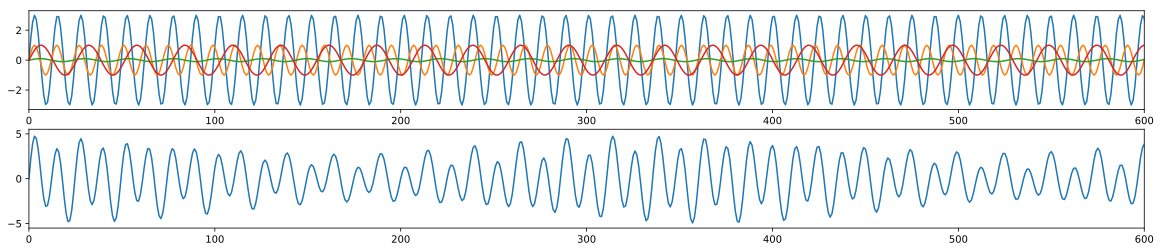

In [3]:
fig0=plt.figure(figsize=(20,4))
ax0=fig0.add_subplot(211)
plt.plot(datehours,sin1)
plt.plot(datehours,sin2)
plt.plot(datehours,sin3)
plt.plot(datehours,sin4)
ax0.set_xlim([0,600])
ax1=fig0.add_subplot(212)
plt.plot(datehours,bigsin)
ax1.set_xlim([0,600])

(0, 600)

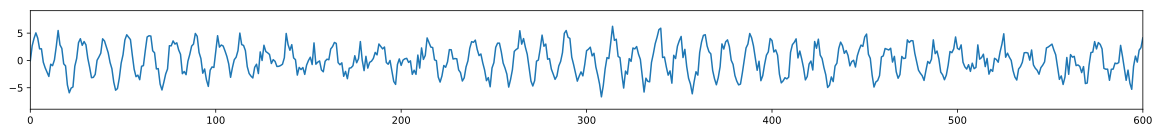

In [4]:
#Adding some noise

wea=np.random.randn(len(datehours)) * 1.
bigsin=bigsin+wea


fig0=plt.figure(figsize=(20,4))
ax0.set_xlim([0,600])
ax1=fig0.add_subplot(212)
plt.plot(datehours,bigsin)
ax1.set_xlim([0,600])

In [5]:
prediction_t0=datetime(1900,1,1)
hours=np.arange(0,len(datehours)-1)*1.0
times=Tide._times(prediction_t0,hours)
dt0=datetime(1900,1,1)
dtdatehours=Tide._times(dt0,hours)

In [6]:
my_tide=Tide.decompose(bigsin[0:24000],dtdatehours[0:24000])
                              
constituent=[c.name for c in my_tide.model['constituent']]
df=DataFrame(my_tide.model,index=constituent).drop('constituent', axis=1)
df.sort_values(by='amplitude',ascending=False)

,amplitude,phase
M2,2.933266,98.264391
O1,1.097216,76.865712
S2,1.007427,89.720087
K1,0.100625,108.061871
P1,0.031644,355.603129
mu2,0.023280,333.809849
MN4,0.022166,348.622923
Sa,0.021943,334.071815
Ssa,0.018734,275.811255
M8,0.017548,217.283949


In [7]:
my_prediction=my_tide.at(times)

(-5, 5)

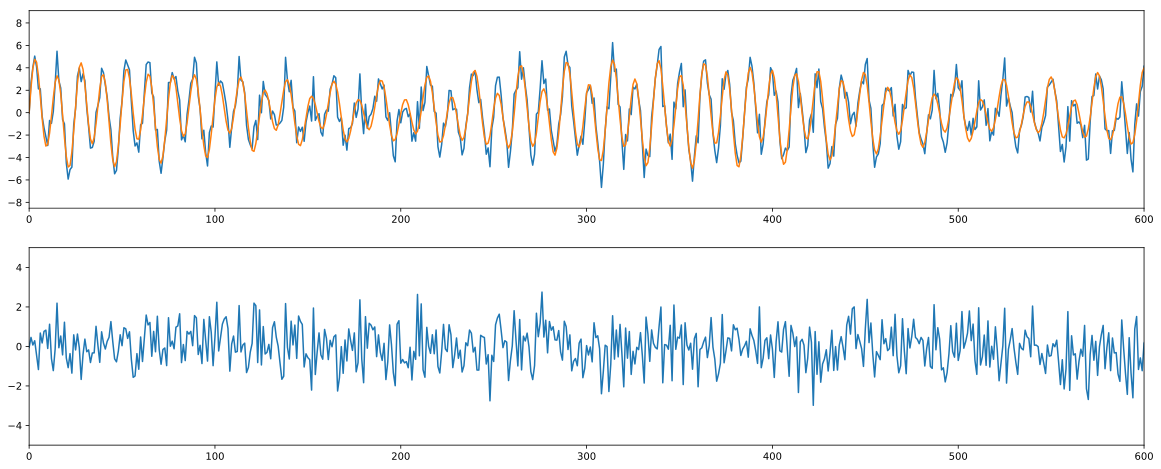

In [8]:
fig1=plt.figure(figsize=(20,8))
ax1=fig1.add_subplot(211)
plt.plot((datehours[0:24000]),bigsin[0:24000])
plt.plot((datehours[0:24000]),my_prediction[0:24000])
ax1.set_xlim([0,600])
ax2=fig1.add_subplot(212)
resi=bigsin[0:24000]-my_prediction[0:24000]
plt.plot((datehours[0:24000]),resi[0:24000])
ax2.set_xlim([0,600])
ax2.set_ylim([-5,5])

In [9]:
filename='/usr/local/share/jupyterhub/data/tides/test.txt'
df=pd.read_csv(filename,header=None,delimiter=' ')
SLdata=df.as_matrix()
SL=SLdata[:,5]*0.01
yy=SLdata[:,0]
mm=SLdata[:,1]
dd=SLdata[:,2]
hh=SLdata[:,3]
mn=SLdata[:,4]

/opt/anaconda3/envs/newenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: x and y must have same first dimension, but have shapes (240000,) and (744,)

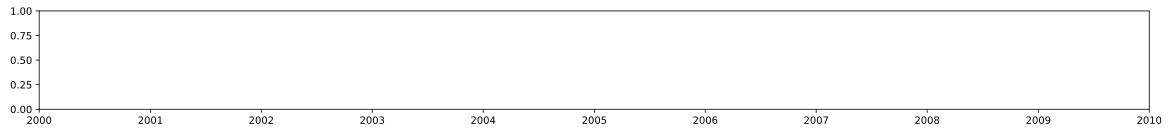

In [10]:
fig0=plt.figure(figsize=(20,4))
ax0.set_xlim([0,744])
ax1=fig0.add_subplot(212)
plt.plot(dtdatehours,SL)

In [11]:
prediction_t0=datetime(yy[0],mm[0],dd[0])
hours=np.arange(0,len(yy))*1.0
times=Tide._times(prediction_t0,hours)
dt0=prediction_t0
dtdatehours=Tide._times(dt0,hours)
my_tide=Tide.decompose(SL,dtdatehours)
my_prediction=my_tide.at(times)

constituent=[c.name for c in my_tide.model['constituent']]
df=DataFrame(my_tide.model,index=constituent).drop('constituent', axis=1)
df.sort_values(by='amplitude',ascending=False)

,amplitude,phase
S1,15.673663,290.254803
R2,10.674250,295.040845
K2,9.242289,140.632585
T2,9.132548,263.107352
K1,8.435900,309.624634
P1,8.368444,262.905395
L2,5.968608,24.865900
S2,5.659484,102.509971
lambda2,4.744728,43.159125
Z0,3.468253,0.000000


(0, 744)

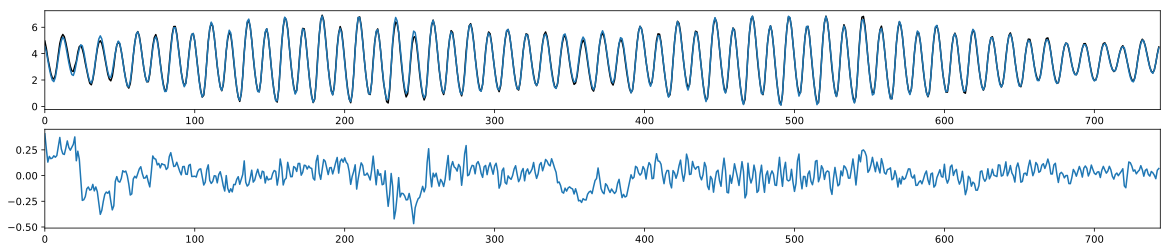

In [15]:
fig1=plt.figure(figsize=(20,4))
ax1=fig1.add_subplot(211)
plt.plot(hours,SL,color='k')
plt.plot(hours,my_prediction)
ax1.set_xlim([0,744])
ax2=fig1.add_subplot(212)
resi=SL-my_prediction
plt.plot(hours,resi)
ax2.set_xlim([0,744])

(array([  1.,   1.,   1.,   5.,   7.,  17.,  44.,  49.,  77., 129., 159.,
        120.,  77.,  31.,  13.,   8.,   2.,   2.,   1.]),
 array([-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
        -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
        -1.00000000e-01, -5.00000000e-02, -1.11022302e-16,  5.00000000e-02,
         1.00000000e-01,  1.50000000e-01,  2.00000000e-01,  2.50000000e-01,
         3.00000000e-01,  3.50000000e-01,  4.00000000e-01,  4.50000000e-01]),
 <a list of 19 Patch objects>)

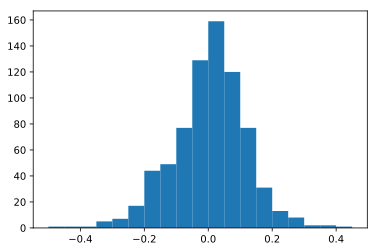

In [13]:
plt.hist(resi,bins=np.arange(-0.5,0.5,0.05))

In [29]:
SL.shape

(744,)

In [102]:
from scipy.fftpack import fft
y=SL[:512]

N=512
T=1/24
t = np.linspace(0.0, N*T, N)
yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)



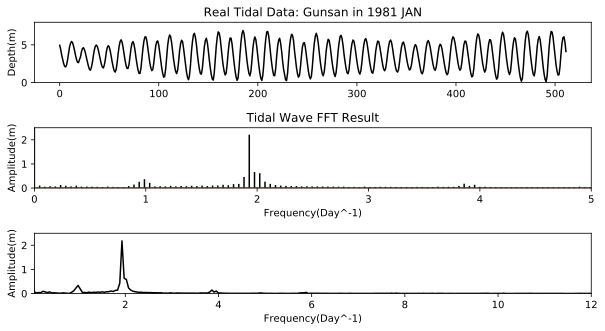

In [106]:
plt.figure(figsize=(10,5))

plt.subplots_adjust(hspace=0.75)

plt.subplot(311)
plt.title("Real Tidal Data: Gunsan in 1981 JAN")
plt.plot(y,color='k')
plt.ylim(0,8)
plt.ylabel('Depth(m)')

plt.subplot(312)
plt.title("Tidal Wave FFT Result")
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]),markerfmt=' ',linefmt='k')
plt.xlim(0, 5)
plt.ylim(0,2.5)
plt.ylabel('Amplitude(m)')
plt.xlabel('Frequency(Day^-1)')

plt.subplot(313)
#plt.title("Tidal Wave FFT Result")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),color='k')
plt.ylim(0,2.5)
plt.xlim(0.05,12)
plt.ylabel('Amplitude(m)')
plt.xlabel('Frequency(Day^-1)')
plt.savefig("Gunsan.svg")